# Probability Mass Functions

**Probability Mass Function (PMF)** is another way to *represent distribution* by mapping each value to its probability.

**Probability** is a frequency expressed as a *fraction of the sample size* (`n`).
  * **Normalization**: process of dividing a *frequency* by a sample size (`n`) to get a *probability*
     * sum of sample's probabilities = 1.0 (all divided by `n`)
     * frequencies --> probabilities
  
#### Code
Given a histogram dictionary (key-value: value-frequency), we can make another (PMF) dictionary that maps from each value to its probability.

`{value: probability,...}`

| Dict Type | Dict Key | Dict Value |
|:------ | :---: | :---: |
| Histogram | value | frequency |
| PMF | value | probability |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nsfg

%matplotlib inline

In [2]:
# Given a dictionary of values' frequencies (histogram)
hist = {1:1,2:2,3:1,5:1}

# Convert to dictionary of values' probabilities
n = float(sum(hist.values()))
pmf_d = {}

for x,freq in hist.items():
    pmf_d[x] = freq / n # probability (fraction of value/ sample size(n))
print pmf_d

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}


In [3]:
def pmf(dictionary):
    """Takes a histogram dictionary (frequency) and 
    create a PMF dictionary (probabilities).
    
    """
    n = float(sum(dictionary.values()))
    pmf_d = {}

    for x,freq in dictionary.items():
        pmf_d[x] = freq / n
    return pmf_d

## Plotting PMFs

  1. **Bar Graphs**: most useful if the number of values in the PMF is *small*.
  2. ** Step Function**: useful if the number of values in the PMF is *large* & PMF is smooth.
  
#### PMFs vs.  Histograms (Frequency)
Plotting with the PMF, instead of a histogram, will compare 2 distributions *without being mislead by the difference in sample size*.

**Main Idea**: Both are useful to explore data and identify patterns & relationships since both can portray the distribution.

#### Example: Pregnancy Length PMFs (Firsts vs. Others)
**Interpretations**:
  * *First* babies seem to be less likely than *Others* to arrive on time (week 39).
  * *First* babies seem more likely to be late (weeks 41 & 42).

In [4]:
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Series for prglngth
firsts_prglngth = firsts['prglngth']
others_prglngth = others['prglngth']

# Histogram - dictionary of value-freq
firsts_freq = firsts['prglngth'].value_counts().to_dict()
others_freq = others['prglngth'].value_counts().to_dict()

# PMF - dictionary of value-prob
firsts_pmf = pmf(firsts_freq)
others_pmf = pmf(others_freq)

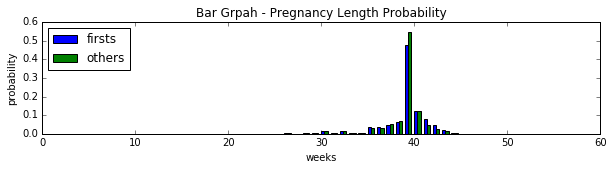

In [5]:
fig = plt.figure(figsize=(10, 2))
bar_width = 0.35
others_pmf_val=[bar_width + x for x in others_pmf.keys()] # side-by-side bars

plt.bar(firsts_pmf.keys(), firsts_pmf.values(), width=bar_width, 
        color='blue', label='firsts')
plt.bar(others_pmf_val, others_pmf.values(), width=bar_width, 
        color='green', label='others')
plt.xlabel('weeks') # value
plt.ylabel('probability') # pmf
plt.title('Bar Grpah - Pregnancy Length Probability') # histogram of PMF
plt.legend(loc='upper left')

plt.show()
plt.close(fig)

Plot of 2 distribution groups (`firsts` & `others`) is better compared through a PMF plot since it mitigates differences in sample size.

A PMF plot is the probability version of the histogram (frequency).

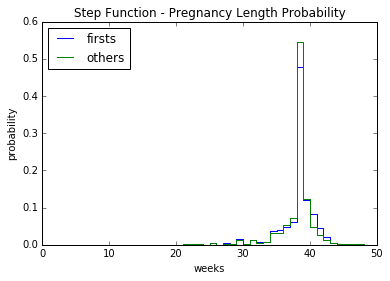

In [6]:
plt.step(firsts_pmf.keys(), firsts_pmf.values(), label='firsts')
plt.step(others_pmf.keys(), others_pmf.values(), label='others',)
plt.xlabel('weeks')
plt.ylabel('probability')
plt.title('Step Function - Pregnancy Length Probability')
plt.legend(loc='upper left')
plt.show()

### Subplot

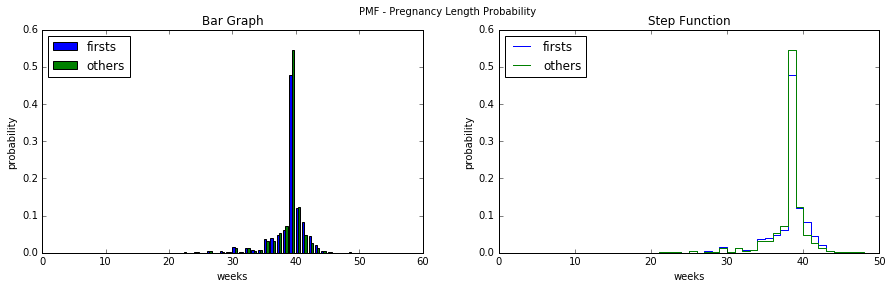

In [7]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
bar_width = 0.35
others_pmf_val=[bar_width + x for x in others_pmf.keys()]

plt.bar(firsts_pmf.keys(), firsts_pmf.values(), width=bar_width, 
        color='blue', label='firsts')
plt.bar(others_pmf_val, others_pmf.values(), width=bar_width, 
        color='green', label='others')
plt.xlabel('weeks')
plt.ylabel('probability')
plt.title('Bar Graph')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.step(firsts_pmf.keys(), firsts_pmf.values(), label='firsts')
plt.step(others_pmf.keys(), others_pmf.values(), label='others',)
plt.xlabel('weeks')
plt.ylabel('probability')
plt.title('Step Function')
plt.legend(loc='upper left')

plt.suptitle('PMF - Pregnancy Length Probability')
plt.show()
plt.close(fig)

### Other Visualizations

Once you have an idea of what's going on in the data, the next step is to design a visualization that makes the patterns previously identified as clear as possible.

In the NSFG data, the biggest differences, in the distributions are near the *mode*. A visualization zooming on this part (weeks 35-46) and transforming the data to emphasize the differences is demonstrated below.
  * Differences in distribution between the 2 groups (`Firsts` & `Others`) is most apparent near the mode.

##### Conclusion
The plot supports the pattern (potential conclusion):   
`First` babies are 
  * less likely to be born in week 39
  * somewhat more likely to be born in weeks 41-42.

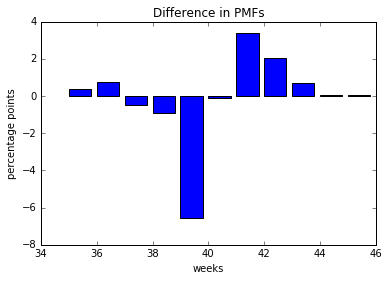

In [8]:
weeks = range(35,46)
diffs = []
for week in weeks:
    p1 = firsts_pmf[week] # probability of Firsts group for a given week
    p2 = others_pmf[week] # probability of Others group for a given week
    diff = 100 * (p1 - p2) # diffs in probability of birth for each value (given week)
    diffs.append(diff)

plt.figure()
plt.bar(weeks, diffs)
plt.xlabel('weeks')
plt.ylabel('percentage points')
plt.title('Difference in PMFs')

plt.show()
plt.close(fig)

## The Class Size Paradox

A type of computation done with **PMF** objects.

#### Example: American Universities' Student-to-Faculty Ratio
At many institutions, the student-to-faculty ratio is ~ 10:1. However, most students are often surprised to discover that their average class is bigger than 10.

Two reasons for this discrepancy:
  1. Students typically take 4-5 classes per semester, but professors often teach 1-2.
  2. The number of students who enjoy a small class is small, but the number of students in a large class is large.
  
The 1st effect is obvious; the 2nd is  more subtle.

**Example**: Suppose a college offers 65 classes in a given semester with the following distribution:

| Size   | Count |   
| :-----:|:-----:| 
| 5-9    | 8  | 
| 10-14  | 8  |  
| 15-19  | 14  |  
| 20-24  | 4 |  
| 25-29  | 6  |  
| 30-34  | 12  |  
| 35-39  | 8  |  
| 40-44  | 3  |  
| 45-49  | 2  |  

**Actual**
If you ask the dean for the average class size, he would construct a PMF, compute the mean, and report that the average class size is 23.7.

d = {7:8, 12:8, 17:14, 22:4, 27:6, 32:12, 37:8, 42:3, 47:2}

In [9]:
d = {7:8, 12:8, 17:14, 22:4, 27:6, 32:12, 37:8, 42:3, 47:2}
pmf_actual = pmf(d)
actual_mean = 0.0
for val, prob in pmf_actual.items():
    actual_mean += val * prob # PMF mean

print "Actual PMF Mean: ", actual_mean

Actual PMF Mean:  23.6923076923


**Observed**
However, if you survey a group of students, sk them how many students are in their classes, and compute the mean...you would think the average class was bigger. How much bigger?

First, compute the distribution observed by students, * where the probability associated with each class size is "biased" by the number of students  in the class*.

Multiply the probability by *x* (number of students who observe that class size) for each class size (*x*). The result is a new PMF, representing the **biased distribution**.

In [10]:
def pmf_norm(d, fraction=1.0):
    """Normalizes PMF so the sum of all probs is fraction.
    Sum off all probability will = 1.0"""
    
    total = sum(d.values())
    factor = fraction / total
    for x in d:
        d[x] *= factor
    return total

def bias_pmf(d):
    """Takes histrogram dictionary and compute the PMF 
    with associated bias for each key-value"""
    bias_pmf = pmf(d)
    
    for val, prob in bias_pmf.items():
        bias_pmf[val] = val*prob
    
    pmf_norm(bias_pmf)
    return bias_pmf

In [11]:
# pmf_obs = pmf(d)

# for val, prob in pmf_obs.items():
#     pmf_obs[val] = val*prob
    
# pmf_norm(pmf_obs) # returns total, but normalizes dict as byproduct

pmf_obs = bias_pmf(d)

obs_mean = 0.0
for val, prob in pmf_obs.items():
    obs_mean += val * prob # PMF mean

print "Observed PMF Mean: ", obs_mean

Observed PMF Mean:  29.1233766234


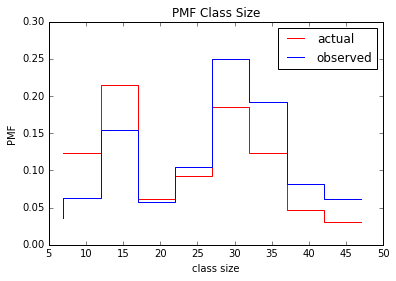

In [12]:
def sorted_dict(d):
    """Creates 2 lists, keys and values, from the sorted dictionary."""
    x = []
    y = []
    for key in sorted(d.keys()):
        x+= [key]
        y+= [d[key]]
    return x,y

x_act, y_act = sorted_dict(pmf_actual)
x_obs, y_obs = sorted_dict(pmf_obs)

plt.step(x_act, y_act, label='actual', color='red')
plt.step(x_obs, y_obs, label='observed')
plt.xlabel('class size')
plt.ylabel('PMF')
plt.title('PMF Class Size')
plt.legend(loc='upper right')
plt.ylim([0.0,0.30])
plt.show()
plt.close(fig)

**Interpretation**: The biased distribution (observed) have fewer small classes and more large ones. 

The mean of the biased distribution is 29.1, ~ 25% higher than the actual mean.

**Actual Mean** = 23.7  
**Observed Mean** = 29.1

### Alternative to Obtaining the Unbiased ('Actual') Mean
#### Solution to Limited Reliable Data
For example, in the event that the *actual* class size cannot be obtained from the dean. You're limited to observed values that are biased.

The *actual* distribution can be estimated from the *observed* distribution. Choose random sample of students & ask how many are in their classes. (Inverted process of finding biased PMF).

In [13]:
def unbiased_pmf(biased_pmf):
    """Find actual/unbiased PMF based on observed data.
    
    biased_pmf: biased PMF dictionary
    """ 
    new_pmf = biased_pmf.copy()
    for val, prob in biased_pmf.items():
        new_pmf[val] = prob * (1.0/val)
    
    pmf_norm(new_pmf)
    return new_pmf

In [16]:
# check if unbias matches actual
unbias_pmf = unbiased_pmf(pmf_obs)
for key in unbias_pmf.keys():
    if round(unbias_pmf[key],5) != round(pmf_actual[key],5):
        print False
#     print True

unbias_mean = 0.0
for val, prob in unbias_pmf.items():
    unbias_mean += val * prob # PMF mean

print "\n", "Unbiased PMF Mean = ", unbias_mean


Unbiased PMF Mean =  23.6923076923


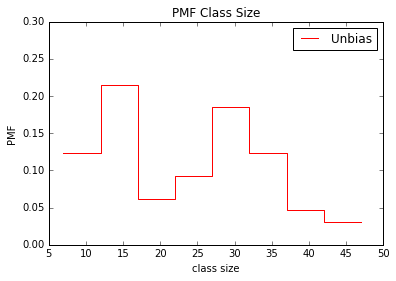

In [15]:
x_unbias, y_unbias = sorted_dict(unbias_pmf)

plt.step(x_unbias, y_unbias, label='Unbias', color='red')
plt.xlabel('class size')
plt.ylabel('PMF')
plt.title('PMF Class Size')
plt.legend(loc='upper right')
plt.ylim([0.0,0.30])
plt.show()
plt.close(fig)